# Data Project - Stock Market Analysis
In this portfolio project i'll collect data from the stock market, particularly some technology stocks and will use pandas to get stock information, visualize different aspects of it, and  a few ways of analyzing the risk of a stock, based on its previous performance history. I'll also predict future stock prices through a Monte Carlo method!

In [1]:
# import lib
import pandas
from pandas import Series,DataFrame
import numpy as np

In [2]:
# Visualization librabry
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
# For data reader,timestamp & division
from pandas_datareader import data as web
from datetime import datetime
from __future__ import division

In [4]:
# The tech stocks that i'll use for this project
comp=['AAPL','GOOG','MSFT','AMZN']
end=datetime.today()
start=datetime(end.year-1,end.month,end.day)

In [5]:
# It's grabing yahoo finance data and setting as a dataframe
for stock in comp:
    globals()[stock]=web.DataReader(stock,'yahoo',start,end)
# Here globals() is a way of setting the DataFrame names easily

In [6]:
# Summary of Apple finance
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,194.261746,190.342778,192.261667,192.366151,3.249823e+07,190.979915
std,21.713070,21.505492,21.580853,21.590336,1.388875e+07,21.150560
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,141.039642
25%,175.967499,173.747501,174.872501,174.832497,2.308030e+07,174.111996
50%,195.279999,191.534996,192.979996,193.709999,2.942395e+07,192.272141
75%,210.074997,206.832497,209.312500,208.872498,3.876472e+07,206.713852
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,229.392090


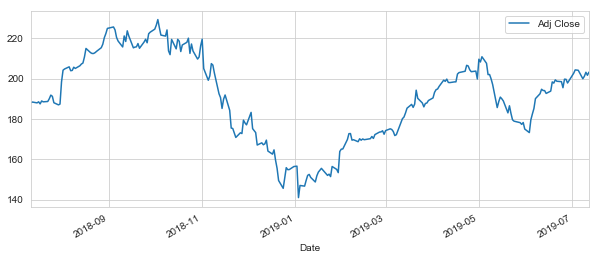

In [7]:
# A historical view of the Adj closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

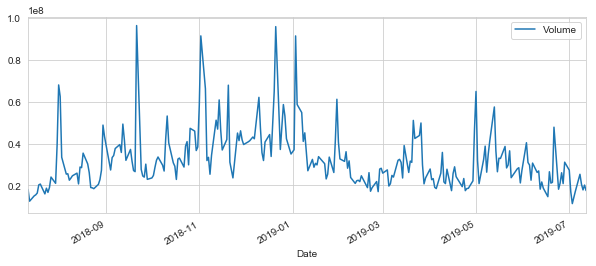

In [8]:
# plot of the total volume of stock being traded each day
AAPL['Volume'].plot(legend=True,figsize=(10,4))

# Moving AVG

In [9]:
# Plot for several moving averages
day = [10,20,50]

for ma in day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] =AAPL.Close.rolling(ma).mean()

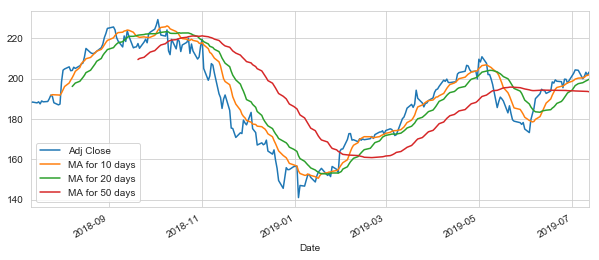

In [10]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4),)

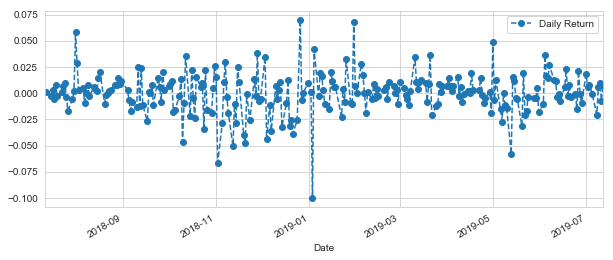

In [15]:
# Use pct_change to find the percent change for each day and plot the daily return percentage
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

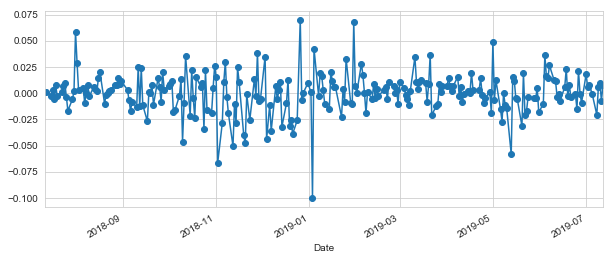

In [17]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=False,linestyle='-',marker='o')

C:\Users\RAUSHAN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


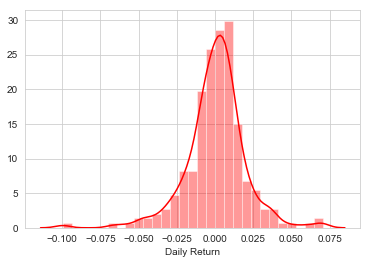

In [18]:
# The NaN values can't be read by seaborn so used dropna() here.
sns.distplot(AAPL['Daily Return'].dropna(),color='red')

C:\Users\RAUSHAN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


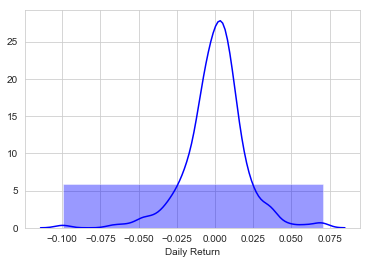

In [21]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=1,color='blue')

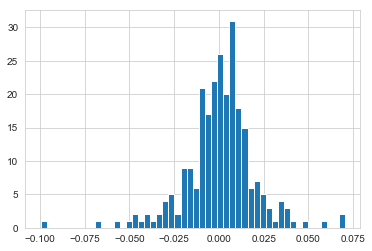

In [23]:
AAPL['Daily Return'].hist(bins=50)

In [26]:
## Grabed all the closing prices for the tech stock list into one DataFrame
df_closing=web.DataReader(comp,'yahoo',start,end)['Adj Close']
df_closing.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-07-12,188.165741,1796.619995,1183.479980,102.525146
2018-07-13,188.461243,1813.030029,1188.819946,103.745331
2018-07-16,188.047531,1822.489990,1183.859985,103.233643
2018-07-17,188.579453,1843.930054,1198.800049,104.257019
2018-07-18,187.545181,1842.920044,1195.880005,103.440285
2018-07-19,189.003006,1812.969971,1186.959961,102.731789
2018-07-20,188.569595,1813.699951,1184.910034,104.571907
2018-07-23,188.737030,1802.000000,1205.500000,106.244736
2018-07-24,190.106216,1829.239990,1248.079956,105.939697


In [28]:
# A new tech returns DataFrame
comp_rets=df_closing.pct_change()
comp_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-07-12,NaN,NaN,NaN,NaN
2018-07-13,0.001570,0.009134,0.004512,0.011901
2018-07-16,-0.002195,0.005218,-0.004172,-0.004932
2018-07-17,0.002829,0.011764,0.012620,0.009913
2018-07-18,-0.005485,-0.000548,-0.002436,-0.007834


C:\Users\RAUSHAN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


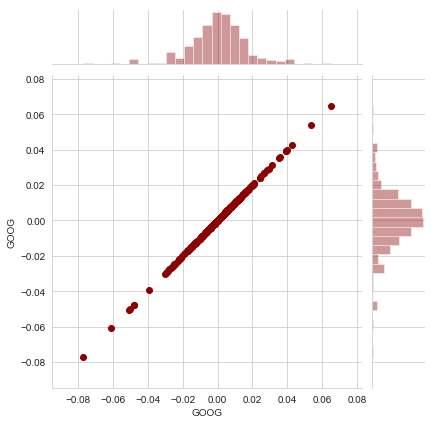

In [30]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',comp_rets,color='darkred')

C:\Users\RAUSHAN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


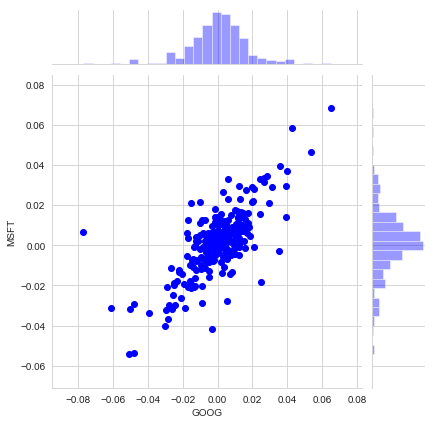

In [33]:
# compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',comp_rets,'scatter',color='blue')

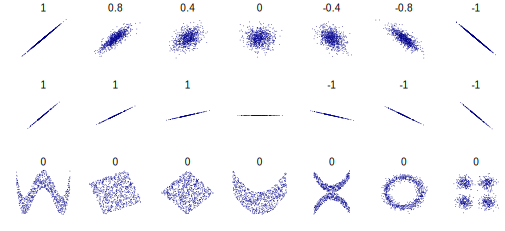

In [34]:
# Pearson Correlation Value
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

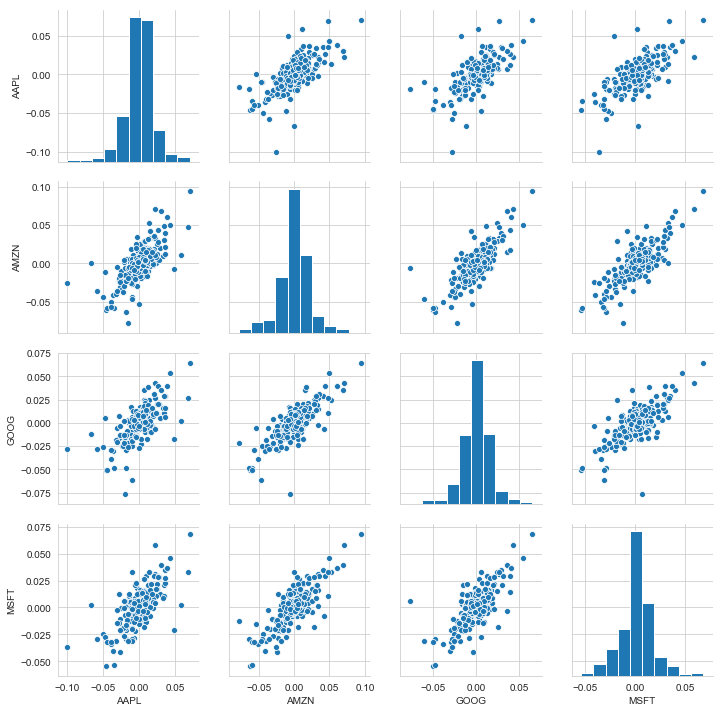

In [35]:
sns.pairplot(comp_rets.dropna())

In [4]:
ret_fig=sns.PairGrid(comp_rets.dropna())
ret_fig.map_lower(plt.scatter,color='green')
ret_fig.map_upper(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

NameError: name 'comp_rets' is not defined

In [ ]:

# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)